# Importing Datasets

In [8]:
#Load libraries
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# Loading Dataset

In [2]:
url = "/Users/jarvis3.0/Desktop/PARKINSONS/parkinsons2.csv"
names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE','status']
dataset = pandas.read_csv(url, names = names)

In [10]:
dataset = dataset.drop(dataset.index[0])

In [16]:
dataset.dtypes.sample(10)

Shimmer:APQ3    float64
MDVP:Fo(Hz)     float64
HNR             float64
DFA             float64
MDVP:PPQ        float64
MDVP:Fhi(Hz)    float64
MDVP:APQ        float64
Shimmer:DDA     float64
Jitter:DDP      float64
spread1         float64
dtype: object

In [15]:
dataset = dataset.astype(float)

In [5]:
len(dataset.columns)

23

In [6]:
array = dataset.values
X = array[:,1:22]
Y = array[:,22]
        
validation_size = 0.20
seed =7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y, test_size = validation_size, random_state=seed)

In [101]:
type(X)

numpy.ndarray

In [102]:
model = LogisticRegression()
rfe = RFE(model, 15)
fit = rfe.fit(X, Y)

In [104]:
fit.n_features_
print(fit.support_)
print(fit.ranking_)

[False False  True False False False  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True]
[6 4 1 7 2 3 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1]


In [93]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Building Models

In [57]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.827500 (0.038106)
LDA: 0.872917 (0.055536)
KNN: 0.820000 (0.069292)
CART: 0.802500 (0.079149)
NB: 0.688333 (0.136407)
SVM: 0.774583 (0.093883)


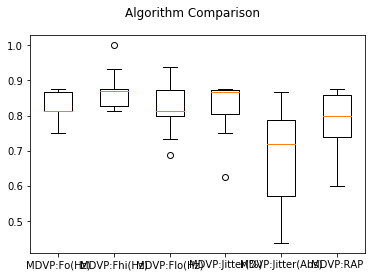

In [56]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [7]:
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.871794871795
[[ 6  1]
 [ 4 28]]
             precision    recall  f1-score   support

          0       0.60      0.86      0.71         7
          1       0.97      0.88      0.92        32

avg / total       0.90      0.87      0.88        39

